# Machine Learning Engineer Nanodegree
## Capstone Project: Segmentation of Credit Card Holders

James Wanderi Kinyanjui
July 29, 2019

---

The project is based on the [proposal](https://github.com/wanderijames/credit-card-customer/blob/master/proposal.pdf) submitted for this Nanodegree program.

We will be using the [Kaggle data](https://www.kaggle.com/arjunbhasin2013/ccdata) for this project. Our goal is to create clusters of the card holders using unsupervised learning technique and then used supervised learning in assigning groups to new card holders.

## Data Analysis

In this section we are going to undertstand our dataset.

Specifically, we will find which features are important to finding our solution to the problem.

---

### Load data

In [1]:
# Import libraries necessary for this project
import random
import warnings
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

from feature_relevance import cc_feature_relevance

# Pretty display for notebooks
%matplotlib inline

# Reproduce random-ability
random.seed(0)

# Ignore warnings
warnings.simplefilter("ignore")

try:
    raw_data = pd.read_csv("ccdata.zip")
    print("Our dataset has {} samples with {} features each.".format(*raw_data.shape))
except Exception as err:
    print("Dataset could not be loaded. Is the dataset missing? {}".format(err))

Our dataset has 8950 samples with 18 features each.


### Data Exploration

In [2]:
raw_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Display a description of the dataset
display(raw_data.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# See feature-feature relavance
feature_df = cc_feature_relevance(raw_data)
feature_df.head()

,_predicted_feature,_score,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,BALANCE,0.929095,0.000000,0.009159,0.003304,0.002516,0.004324,0.005228,0.001105,0.001752,0.000916,0.002463,0.003666,0.002357,0.263088,0.010992,0.674430,0.010960,0.003739
1,BALANCE_FREQUENCY,0.726351,0.214835,0.000000,0.026761,0.010620,0.011750,0.036418,0.148325,0.006976,0.012705,0.011317,0.007941,0.013246,0.019927,0.075921,0.358034,0.029923,0.015301
2,PURCHASES,0.973449,0.001652,0.001118,0.000000,0.793856,0.179984,0.000028,0.000117,0.000169,0.000183,0.000259,0.001962,0.009500,0.002122,0.004869,0.001040,0.003139,0.000002
3,ONEOFF_PURCHASES,0.958696,0.004510,0.000063,0.836774,0.000000,0.083786,0.000331,0.000329,0.033267,0.003355,0.000117,0.000273,0.001664,0.002357,0.030446,0.002236,0.000481,0.000008
4,INSTALLMENTS_PURCHASES,0.857005,0.003768,0.006803,0.568401,0.206284,0.000000,0.000741,0.001219,0.020426,0.131829,0.000258,0.000343,0.019243,0.020159,0.011433,0.006718,0.002360,0.000016


In [13]:
feature_df.drop(['_predicted_feature', '_score'], axis=1, inplace=True)
display(feature_df.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.088803,0.027843,0.158212,0.108804,0.077895,0.031615,0.049663,0.016333,0.026061,0.052754,0.081190,0.062418,0.044211,0.063511,0.092263,0.011442,0.006982
std,0.137191,0.079065,0.259882,0.237563,0.179790,0.059912,0.071748,0.016262,0.040643,0.164017,0.217250,0.191393,0.066922,0.089843,0.174872,0.016605,0.006958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003768,0.000836,0.005881,0.004699,0.007762,0.000741,0.001219,0.006508,0.003355,0.000259,0.000525,0.008489,0.002818,0.007215,0.003412,0.002360,0.000931
50%,0.024147,0.007383,0.017513,0.010673,0.020186,0.006483,0.005996,0.007989,0.008553,0.005537,0.004370,0.015649,0.020159,0.020232,0.026735,0.004455,0.003739
75%,0.051353,0.014505,0.121097,0.041578,0.036459,0.036418,0.077475,0.027574,0.023291,0.011737,0.025743,0.027829,0.056162,0.075921,0.096299,0.010960,0.013801
max,0.391555,0.332340,0.836774,0.793856,0.750951,0.242029,0.189565,0.061139,0.131829,0.676666,0.832146,0.803856,0.263088,0.301293,0.674430,0.065418,0.019012


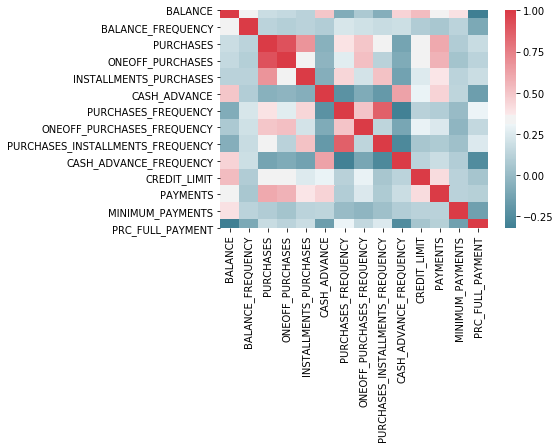

In [19]:
import seaborn as sns

corr = raw_data.loc[:,raw_data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))